In [2]:
import pandas as pd

In [3]:
columns = ["age", "workClass", "fnlwgt", "education", "education-num","marital-status", "occupation", "relationship",
          "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

In [4]:
train_data = pd.read_csv('data/adult.data', names=columns,skipinitialspace=True, na_values='?')
test_data  = pd.read_csv('data/adult.test', names=columns,skipinitialspace=True, skiprows=1, na_values='?')

In [5]:
print(train_data.shape)
print(test_data.shape)

(32561, 15)
(16281, 15)


In [6]:
train_data.isnull().sum()

age                  0
workClass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [7]:
test_data.isnull().sum()

age                 0
workClass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [8]:
data = pd.concat([train_data,test_data])

In [9]:
data.shape

(48842, 15)

In [10]:
data.isnull().sum()

age                  0
workClass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workClass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [12]:
data.head()

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [14]:
num_categories = data.select_dtypes(include=['int'])
cat_categories = data.select_dtypes(include=['object'])

In [15]:
num_categories.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [16]:
cat_categories.columns

Index(['workClass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

In [17]:
for i in num_categories.columns:
    print(i," : ",data[i].unique())
    

age  :  [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
fnlwgt  :  [ 77516  83311 215646 ... 173449  89686 350977]
education-num  :  [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
capital-gain  :  [ 2174     0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386
  7298  1409  3674  1055  3464  2050  2176   594 20051  6849  4101  1111
  8614  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580
  3471  4865 99999  6514  1471  2329  2105  2885 25124 10520  2202  2961
 27828  6767  2228  1506 13550  2635  5556  4787  3781  3137  3818  3942
   914   401  2829  2977  4934  2062  2354  5455 15020  1424  3273 22040
  4416  3908 10566   991  4931  1086  7430  6497   114  7896  2346  3418
  3432  2907  1151  2414  2290 15831 41310  4508  2538  3456  6418  1848
  3887  5721  9562  1455  2036  1831 

In [18]:
for i in cat_categories.columns:
    print(i," : ",data[i].unique())
    

workClass  :  ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education  :  ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
marital-status  :  ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation  :  ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship  :  ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race  :  ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex  :  ['Male' 'Female']
native-country  :  ['United-States' 'Cuba' 'Jamaica' 'India' nan 'Mexico' 'South'
 'Puerto-Rico

In [19]:
data.head()

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


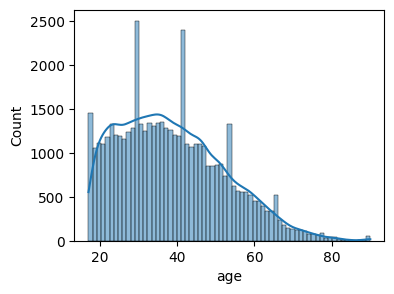

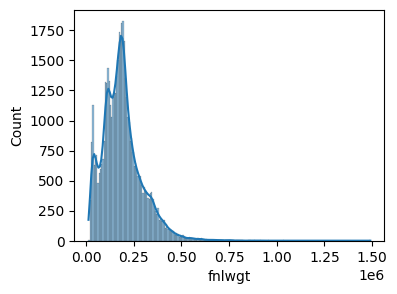

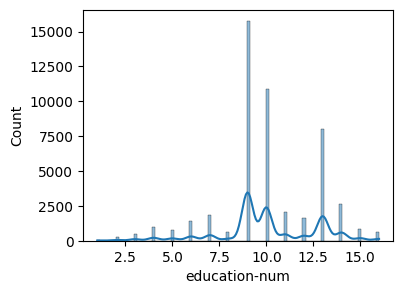

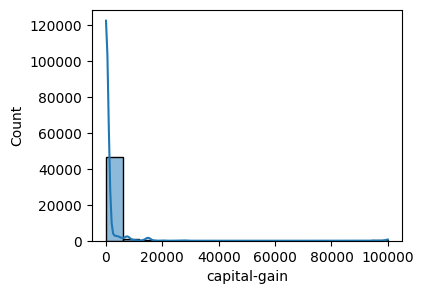

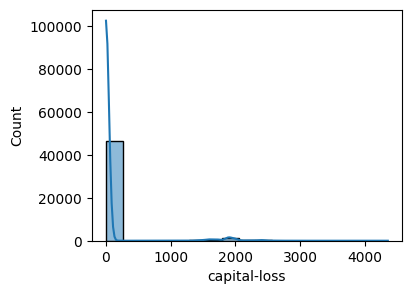

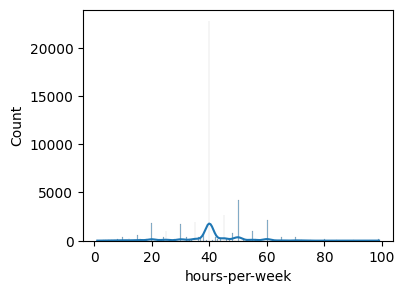

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt 
x=0
for i in num_categories:
    plt.figure(figsize=(4,3))
    sns.histplot(data=data,x=i,kde=True)
    plt.show()

<Axes: >

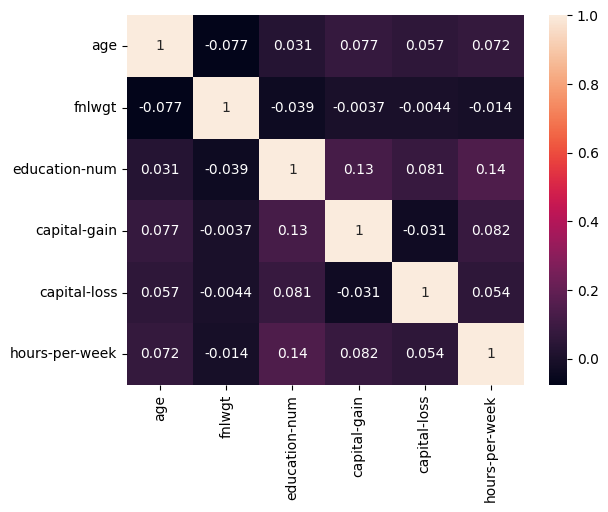

In [21]:
sns.heatmap(data.corr(numeric_only=[num_categories]),annot=True)

<Axes: xlabel='income'>

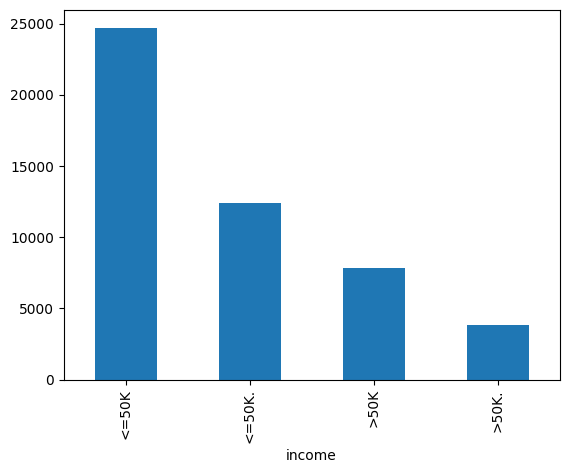

In [22]:

data['income'].value_counts().plot(kind='bar')

In [23]:
data['income'] = data['income'].replace(['<=50K.'], '<=50K')
data['income'] = data['income'].replace(['>50K.'], '>50K')

<Axes: xlabel='income'>

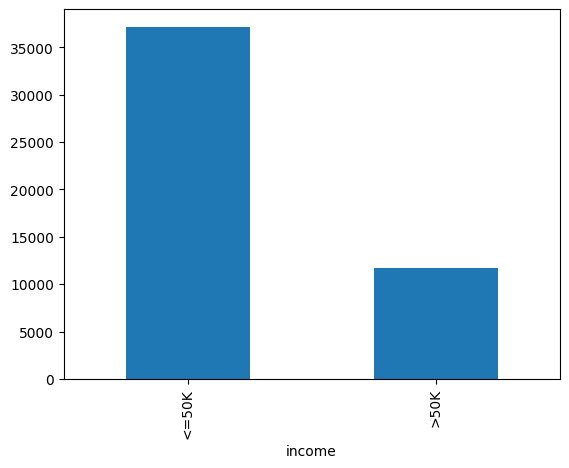

In [24]:
data['income'].value_counts().plot(kind='bar')

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,StandardScaler,OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [26]:
LE = LabelEncoder()
data.income  = LE.fit_transform(data.income)

In [27]:
data.income.unique()

array([0, 1])

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workClass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 5.8+ MB


In [29]:
data.drop(['fnlwgt', 'education'],axis=1,inplace = True)

In [30]:
num_categories=['age', 'education-num', 'capital-gain', 'capital-loss','hours-per-week']
cat_categories=['workClass', 'marital-status', 'occupation','relationship', 'race', 'native-country','sex']

In [31]:
num_pipeline = Pipeline(
    steps = [
        ('imputer',SimpleImputer(strategy='median')),
        ("scaler",StandardScaler())
])

In [32]:
cat_pipeline = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('encoder',OrdinalEncoder()),
        ("scaler",StandardScaler())
        
])

In [33]:
preprocessor = ColumnTransformer([
    ("num_pipeline",num_pipeline,num_categories),
    ("cat_pipeline",cat_pipeline,cat_categories)
])

In [34]:
x = data.drop(['income'],axis=1)
y = data['income']

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=30)

In [36]:
x_train = pd.DataFrame(preprocessor.fit_transform(x_train))
x_test = pd.DataFrame(preprocessor.transform(x_test))

In [37]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [38]:
y_pred= LR.predict(x_test)

In [40]:
print(f"accuracy score : {accuracy_score(y_test,y_pred)}")

accuracy score : 0.8295229645806319


In [42]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     11222
           1       0.71      0.45      0.55      3431

    accuracy                           0.83     14653
   macro avg       0.78      0.70      0.72     14653
weighted avg       0.82      0.83      0.81     14653

